## Data Scientist Position Challenge

** Thank you for taking the time to complete this challenge. As a data scientist for Hart you will be responsible for sourcing data from many sources, data wrangling, and analysis. This is an opportunity to showcase your skills.**

**Good luck! **

## Instructions

1- Download this notebook

2- Make sure you have numpy, pandas, matplotlib and sklearn installed

3- Read the instructions for each section and write code to accomplish each task within the designated area

4- Save your final notebook (.ipynb) and email it to amir.ziai@hart.com

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd

## Part 1- Read a CSV file into memory

#### Variables needed for this part (do not delete)

In [12]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
headers = 'age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-county,income'

#### Instructions
Using the pandas library (if you are using Python) read the above url (url variable) into a dataframe. Make sure that you (1) skip the first 10 rows and (2) use the headers variables defined above as the column header.

Note that adult.data is commad separated and has no header.

**Output: print the dimensions (shape) of the dataframe as well as the top 5 rows**

In [13]:
# START CODE
import pandas
from pandas import DataFrame
import requests 
import sys
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
    
#url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data=requests.get(url).content
#print (data.text[0:5])
df=pandas.read_csv(StringIO(data.decode('utf-8')),sep=",",header=None,skiprows=10)
#df_with_header=pandas.DataFrame([df],columns=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-county","income"])
df.columns=["age","workclass","fnlwgt","education","educationnum","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-county","income"]
print (df.shape)
print (df.head(5))
# END CODE

(32551, 15)
   age   workclass  fnlwgt      education  educationnum       marital-status  \
0   37     Private  280464   Some-college            10   Married-civ-spouse   
1   30   State-gov  141297      Bachelors            13   Married-civ-spouse   
2   23     Private  122272      Bachelors            13        Never-married   
3   32     Private  205019     Assoc-acdm            12        Never-married   
4   40     Private  121772      Assoc-voc            11   Married-civ-spouse   

         occupation    relationship                 race      sex  \
0   Exec-managerial         Husband                Black     Male   
1    Prof-specialty         Husband   Asian-Pac-Islander     Male   
2      Adm-clerical       Own-child                White   Female   
3             Sales   Not-in-family                Black     Male   
4      Craft-repair         Husband   Asian-Pac-Islander     Male   

   capital-gain  capital-loss  hours-per-week   native-county  income  
0             0     

## 2- Filtering

#### Instructions

1- Create a new dataframe that excludes the " Preschool" variable (do not mutate the first dataframe). Call this dataframe df1.

2- Create a new dataframe by filtering rows that fall within 1st and 3rd quartile of "education-num" (hint: describe gives you summary statistics for a variable). Call this dataframe df2.

**Output: Print the percentage descrease in the number of rows after the filtering.**

In [14]:
education_exclude = [' Preschool']

In [15]:
# START CODE
df1=df[df.education!="Preschool"]
#print (df1.describe())
#df2=df1.educationnum.quantile([0.25,0.75])
#print (df2)
df2=df1[(df1.educationnum >= df1.educationnum.quantile(0.25)) & (df1.educationnum <= df1.educationnum.quantile(0.75))]
print ((len(df1.index)-len(df2.index))*100/len(df1.index))
# END CODE

37


## 3- Grouping and visualization

#### Instructions

1- Group the rows in df2 by "occupation" and aggregate the age within each group.

**Output: display a horizontal bar chart of average age by occupation**

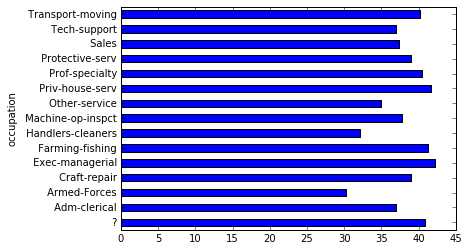

In [16]:
# START CODE
df2_groupby=(df['age'].groupby(df['occupation']))
df2_groupby.columns=["occupation","age"]
#print (df2_groupby.mean())

df3=df2_groupby.mean()

#print (type(df3))

plt.figure()
df3.plot(kind='barh')
# END CODE

## 4- Naiive Bayes Classification (Extra Credit)

** Attempt this section only if you have completed other sections and have extra time **

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

url_train = 'https://s3-us-west-1.amazonaws.com/amirziai-accessfuel/nb_train.csv'
url_test = 'https://s3-us-west-1.amazonaws.com/amirziai-accessfuel/nb_test.csv'

#### Instructions

Train a Naiive Bayes classifier using the dataset in "url_train". Each row in the dataset consists of a "Sentence" and a "Tag" which encodes the sentiment. Your classifier should use the words in a sentence as features for that row. For this part simply count the number of occurences of each word in the dictionary (you can accomplish this using CountVectorizer from the scikit learn library if you are using Python).
For more information refer to:
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

*If you are using pandas empty values are by defaul encoded as NaN. scikit learn does not play well with NaN. Make sure that you handle NaNs before you predict*

**Output: Print the predictions of your NB model for the test dataset**

In [18]:
# START CODE

# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import cross_validation
from sklearn.metrics import classification_report
import numpy as np
import requests
import csv
import sys
from sklearn.metrics import accuracy_score
import pandas 
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO
import re
from sklearn.metrics import classification_report

url_train = 'https://s3-us-west-1.amazonaws.com/amirziai-accessfuel/nb_train.csv'
url_test = 'https://s3-us-west-1.amazonaws.com/amirziai-accessfuel/nb_test.csv'

data=requests.get(url_train).content
#print (data.text[0:5])
df=pandas.read_csv(StringIO(data.decode('utf-8')),sep=",",skip_blank_lines=True,header=0)
df3=df.dropna()
#print (df.head(5))

data2=requests.get(url_test).content
#print (data.text[0:5])
df2=pandas.read_table(StringIO(data2.decode('utf-8')),header=0,skip_blank_lines=True)
df4=df2.dropna()
#print (df4)

vectorizer=cv(stop_words='english')
f_corpus=vectorizer.fit_transform(df3.Sentence.tolist()+df4.Sentence.tolist())
f_array=f_corpus.toarray()
train_data,test_data,train_tag,test_tag=cross_validation.train_test_split(
        f_array[0:len(df3)], 
        df3.Tag,
        train_size=0.85, 
        random_state=43)
classify=MultinomialNB().fit(f_array[0:len(df3)],df3.Tag)
predict=classify.predict(f_array[len(df3):])
#print(classification_report(test_tag, predict))
for sentence,tag in zip(df4.Sentence,predict):
	print (sentence +" => "+ tag)
# END CODE

gain software mouse overall version bad => Pos
impressed love => Pos
virus version terrible => Pos
aware love git account improve security => Pos
overall useful to terrible => Pos
cloud love control terrible => Pos
love version privacy overall => Pos
keyboard impressed gain => Pos
keyboard version git control bad => Pos
mouse privacy version keyboard => Pos
useful love aware privacy improve => Pos
the virus love bad gain mouse => Pos
impressed => Pos
privacy account the to => Pos
love privacy sky quality => Pos
bad useful => Pos
abuse love => Pos
account gain version keyboard terrible => Pos
cloud love terrible => Pos
control sky impressed improve bad mouse => Pos
cloud mouse abuse software => Neg
aware bad control version privacy => Pos
improve bad useful git privacy => Pos
control account => Pos
